In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        # Gave column names to each column on import
import warnings
warnings.filterwarnings('ignore')


col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df = pd.read_csv('car_evaluation.csv', header = 0, names = col_names)

df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [2]:
df.info()  # Inspecting the dataset, no null values but all strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [3]:
#conda install -c conda-forge category_encoders

In [4]:
#if isinstance(df, pd.DataFrame):
#    print('True')
#else:
#
print('False')

False


In [5]:
for column in df.columns:   # Finding unique values for each column for encoding each value next
    unique_values = df[column].unique()
    
    print(df[column].name, unique_values)

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
persons ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['med' 'high' 'low']
class ['unacc' 'acc' 'vgood' 'good']


In [6]:
import category_encoders as ce       # Encoding the values of each column to make more compatible for random forest model


encoders = [
    ce.OrdinalEncoder(cols = ['class'],
                            return_df = True,
                            mapping = [{'col': 'class', 'mapping': {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}}]),
    
    ce.OrdinalEncoder(cols = ['safety'],
                            return_df = True,
                            mapping = [{'col': 'safety', 'mapping': {'low': 0, 'med': 1, 'high': 2}}]),

    ce.OrdinalEncoder(cols = ['lug_boot'],
                            return_df = True,
                            mapping = [{'col': 'lug_boot', 'mapping': {'small': 0, 'med': 1, 'big': 2}}]),


    ce.OrdinalEncoder(cols = ['persons'],
                             return_df = True,
                             mapping = [{'col': 'persons', 'mapping': {'2': 0, '4': 1, 'more': 2}}]),

    ce.OrdinalEncoder(cols = ['doors'],
                            return_df = True,
                            mapping = [{'col': 'doors', 'mapping': {'2': 2, '3': 3, '4': 4, '5more': 5}}]),


    ce.OrdinalEncoder(cols = ['maint'],
                            return_df = True,
                            mapping = [{'col': 'maint', 'mapping': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}}]),

    ce.OrdinalEncoder(cols = ['buying'], 
                             return_df = True,
                            mapping = [{'col': 'buying', 'mapping': {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3}}])]



#df_copy = encoder1.fit_transform(df)
#df_copy = encoder2.fit_transform(df_copy)
#df_copy = encoder3.fit_transform(df_copy)
#df_copy = encoder4.fit_transform(df_copy)
#df_copy = encoder5.fit_transform(df_copy)
#df_copy = encoder6.fit_transform(df_copy)
#df_copy = encoder7.fit_transform(df_copy)

df_copy = df.copy()


for encoder in encoders:                         # Using loop to apply encoder to each copy of the dataframe
   
    df_copy = encoder.fit_transform(df_copy)       
    

df_1 = df_copy.copy()

df_1.head(10)


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,0,0,1,0
1,3,3,2,0,0,2,0
2,3,3,2,0,1,0,0
3,3,3,2,0,1,1,0
4,3,3,2,0,1,2,0
5,3,3,2,0,2,0,0
6,3,3,2,0,2,1,0
7,3,3,2,0,2,2,0
8,3,3,2,1,0,0,0
9,3,3,2,1,0,1,0


In [7]:
df_1.isnull().sum()         # Checking for null values, all good

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
x = df_1.drop(['class'], axis = 1)     # Splitting x and y out into numpy arrays for train/test split
y = df_1['class']

x = pd.DataFrame(x).to_numpy()
y = pd.DataFrame(y).to_numpy()

In [9]:
from sklearn.model_selection import train_test_split        # Splitting data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [10]:
x_train

array([[3, 0, 5, 0, 0, 0],
       [0, 3, 4, 0, 1, 0],
       [0, 2, 2, 2, 0, 1],
       ...,
       [3, 3, 2, 0, 2, 2],
       [3, 1, 2, 0, 1, 1],
       [0, 3, 4, 0, 0, 1]])

In [11]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [12]:
x_train.shape, x_test.shape    # checking the shape of the x sets, expected shape

((1295, 6), (432, 6))

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)        # Create the random forest classifier

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score           # Performance using 100 estimators

print('Accuracy score: {0:0.3f}'.format(accuracy_score(y_test, y_pred))) # Accuracy 98.4%

Accuracy score: 0.984


In [16]:
rfc_10 = RandomForestClassifier(n_estimators = 10, random_state = 0)   # Iterating with 10 estimators

rfc_10.fit(x_train, y_train)

y_pred_10 = rfc_10.predict(x_test)

print('Accuracy score with 10 estimators: {0:0.3f}'.format(accuracy_score(y_test, y_pred_10))) # Accuracy 96.3%

Accuracy score with 10 estimators: 0.963


In [17]:
rfc_1000 = RandomForestClassifier(n_estimators = 1000, random_state = 0) # Iterating with 1000 estimators

rfc_1000.fit(x_train, y_train)

y_pred_1000 = rfc_1000.predict(x_test)

print('Accuracy score with 1000 estimators: {0:0.3f}'.format(accuracy_score(y_test, y_pred_1000))) # 98.8%

Accuracy score with 1000 estimators: 0.988


In [20]:
feature_imp = pd.Series(rfc_1000.feature_importances_, 
                        index = df_1.drop(['class'], axis = 1).columns).sort_values(ascending = False)

feature_imp            # Showing the feature importance

safety      0.299944
persons     0.238324
buying      0.159496
maint       0.151340
lug_boot    0.089738
doors       0.061157
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


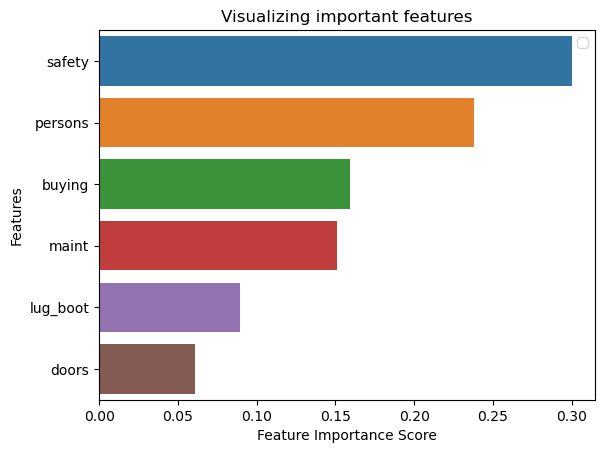

In [25]:
import seaborn as sns
%matplotlib inline

sns.barplot(x = feature_imp, y = feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title('Visualizing important features')

plt.legend()

plt.show()